In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [2]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)
# data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
#해는 survived
y_data = data_df[['Survived']]
# y_data.head(3)

In [4]:
del data_df['Survived']
x_data = data_df.copy()
# x_data.head(3)


#Pclass, Sex, Age

<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [5]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [6]:
# 기본적인 결측치 채우는 방법
mean_age = x_data['Age'].median(skipna=True)
x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

In [7]:
x_data['Sex']=x_data['Sex'].apply(lambda x: 1 if x=='male' else 0)
x_data.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S


In [8]:
x_data_arr=np.array(x_data)
Titanic_data=x_data_arr[:,3:5]
add_tmp_1=x_data_arr[:,1:2]
Titanic_data=np.append(Titanic_data,add_tmp_1,axis=1)

print(Titanic_data[:4,])


[[1 22.0 3]
 [0 38.0 1]
 [0 26.0 3]
 [0 35.0 1]]


In [9]:
y_data_arr=np.array(y_data)
Titanic_y=y_data_arr[:,]

<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [10]:
#2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)
from sklearn import model_selection

#Standard 활용
from sklearn.preprocessing import StandardScaler

In [11]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(
    Titanic_data,Titanic_y,test_size=0.3,random_state=0)

In [12]:
age_train=x_train[:,1:2]
scaler=StandardScaler().fit(age_train)
standardized_X=scaler.transform(age_train)
tmp_train=np.append(x_train[:,0:1],standardized_X,axis=1)
tmp_train=np.append(tmp_train,x_train[:,2:3],axis=1)


age_test=x_test[:,1:2]
# scaler=StandardScaler().fit(age_test)
standardized_X_test=scaler.transform(age_test)
tmp_test=np.append(x_test[:,0:1],standardized_X_test,axis=1)
tmp_test=np.append(tmp_test,x_test[:,2:3],axis=1)
x_train=tmp_train
x_test=tmp_test

print(x_train[:4,])

[[1 1.6465483570217123 1]
 [0 1.4930716969993405 1]
 [1 -2.19036814353758 3]
 [1 1.8767633470552698 1]]


<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

<br>

## 4. Train the model

In [13]:
from sklearn import linear_model

In [14]:
model=linear_model.LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
pred_y=model.predict(x_test)
pred_y_train=model.predict(x_train)

# pred_test
pred_y_prod=model.predict_proba(x_test)

print('Train_Accuracy: ', accuracy_score(pred_y_train,y_train))
print('Test_Accuracy: ', accuracy_score(pred_y,y_test))

Train_Accuracy:  0.797752808988764
Test_Accuracy:  0.7910447761194029


In [17]:
from sklearn.metrics import classification_report

In [18]:
target_name=['Not Survived','Survived']
print('Training Data')
print(classification_report(y_train,pred_y_train,target_names=target_name))

Training Data
              precision    recall  f1-score   support

Not Survived       0.81      0.87      0.84       381
    Survived       0.77      0.68      0.72       242

   micro avg       0.80      0.80      0.80       623
   macro avg       0.79      0.78      0.78       623
weighted avg       0.80      0.80      0.80       623



In [19]:
target_name=['Not Survived','Survived']
print('Test Data')
print(classification_report(y_test,pred_y,target_names=target_name))

Test Data
              precision    recall  f1-score   support

Not Survived       0.83      0.85      0.84       168
    Survived       0.73      0.70      0.71       100

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [20]:
from sklearn.metrics import roc_curve, auc

In [21]:
fpr,tpr,_=roc_curve(y_true=y_test,y_score=pred_y_prod[:,1])
roc_auc=auc(fpr,tpr)
print("AUC: ",roc_auc)

AUC:  0.8529464285714287


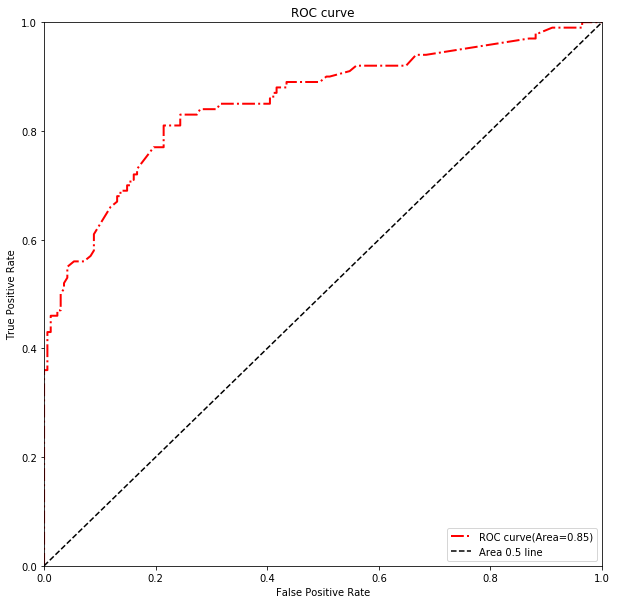

In [22]:
plt.figure(figsize=(10,10))


plt.plot(fpr,tpr,c='red',lw=2,ls='-.',label='ROC curve(Area=%0.2lf)'% roc_auc)
plt.plot([0,1],[0,1],c='black',lw=1.5,ls='--',label='Area 0.5 line')
plt.legend(loc='lower right')



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()
